<big>Problem 1</big>

In [5]:
# import scientific computing packages
import sys
import getpass
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn

In [6]:
# import spatial analysis packages
import shapely
import geopandas as gpd
import fiona
import pyproj

In [7]:
# try to import basemap
try:
    from mpl_toolkits import basemap
except:
    pass

In [8]:
"""
Execute this block and include the output in your writeup.
"""
username = getpass.getuser()
print('User Name: %s'%username)
print('Python version: %s'%sys.version)
print('Numpy version: %s'%np.__version__)
print('Pandas version: %s'%pd.__version__)
print('Scipy version: %s'%scipy.__version__)
print('sklearn version: %s'%sklearn.__version__)

print('shapely version: %s'%shapely.__version__)
print('Geopandas version: %s'%gpd.__version__)
print('Fiona version: %s'%fiona.__version__)
print('Pyproj version: %s'%pyproj.__version__)
try:
    print('Basemap version: %s'%basemap.__version__)
except:
    print('Basemap not installed. Pass')

print('==== All tests cleared ====')

User Name: Seebarsh
Python version: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Numpy version: 1.15.4
Pandas version: 0.24.0
Scipy version: 1.2.0
sklearn version: 0.20.2
shapely version: 1.6.4.post1
Geopandas version: 0.4.0
Fiona version: 1.8.4
Pyproj version: 1.9.6
Basemap version: 1.1.0
==== All tests cleared ====


<big>Problem 2</big>

In [9]:
import string
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
class TextMining:
    def __init__(self, 
                 text_file):
        self.text_file = text_file
        self.load_texts()
        self.texts = self._join_texts(self._clean_texts())
        
    def load_texts(self):
        # load text files into the memmory
        with open(self.text_file, 'r') as rfile:
            self.texts = rfile.readlines()
        #print(self.texts)
    
    def _clean_strings(self, s):
        # clean texts:
        # 1. capital letters --> lower case letters
        # 2. remove "\n"
        # 3. remove all punctuations
        
        s = s.lower()
        exclude = set(string.punctuation)
        exclude.add('\n')
        exclude.add("'")
        s_ = ''.join(ch for ch in s if ch not in exclude)
        #print(s_)
        return s_
        
    def _clean_texts(self):
        # call _clean_strings() to clean the body of texts
        new_texts = []
        for _text_ in self.texts:
            new_texts.append(self._clean_strings(_text_))
        #print(new_texts)
        return new_texts    
        
    def _join_texts(self, t):
        # join paragraphs into a big list
        s = ''
        for _t in t:
            s += (' ' + _t)
        return s[1:]
    
    #####################################################################
    def count_words(self):
        """
        TODO:
        count the number of all words (including numbers) in self.texts
        should return an integer number
        HINT: use split() function
        """

        count = self.texts.split(' ')
        return len(count)
    
    ####################################################################
    def count_unique_words(self):
        """
        TODO:
        count the number of unique words in self.texts
        should return an integer number
        HINT: use set() function
        """
        count = self.texts.split(' ')
        unique = set(count)
        return len(unique)
    
    
    def unique_characters(self):
        """
        TODO:
        return a list of all UNIQUE characters that appear in self.texts
        for example: [' ', '0', '5', '9','a','z']
        HINT: use set() function
        """
        char = self.texts.replace(' ','')
        #print(char)
        unique = set(char)
        return unique        
    
    def unique_numbers(self):
        """
        TODO:
        return a list of all UNIQUE numbers that appear in self.texts. 
        NOTICE: the values in the list have to be integers (NOT strings).
        for example: [1,3,5,9]
        
        HINT: 
        you can use isdigit() to see if a string is a digit number or not.
        for example:
        a = 'sde'
        a.isdigit() --> False
        a = '2'
        a.isdigit() --> True
        
        """
        char = self.unique_characters()
        number = []
        for a in char:
            #print(a.isdigit())
            if a.isdigit():
                number.append(a)
        #print('successfully count unique numbers')
        #print(numbers)
        return number

    ####################################################################
    def alphabet_freq(self):
        """
        TODO:
        return the dictionary dict_alphabet where the keys are the alphabet letters 
        (i.e., 'a', 'b', 'c', ..., 'z') and the values are the frequencies of the corresponding keys.
        for example: {'a': 2002, 
                      'b': 4000,
                      'c': 2231,
                      'd': 3000,
                      ...}
        """
        dict_alphabet = {s: 0 for s in list(string.ascii_lowercase)}
        text = self.texts.replace(' ','')
        for char in text:
            for key in dict_alphabet.keys():
                if char.isalpha():
                    if char == key:
                        dict_alphabet[char] += 1
        #or if char in dict_alphabet.keys()
        return dict_alphabet
    
    def alphabet_freq_df(self, alphabet_dict):
        """
        TODO:
        The input alphabet_dict is the output from freq_alphabet()
        return a pandas dataframe where the first column of the dataframe is the alphabet 
        and the second column of the dataframe is the frequency
        HINT:
        You can use pd.DataFrame.from_dict() function
        """
        alphabet_dict = self.alphabet_freq() 
        df = pd.DataFrame.from_dict(alphabet_dict, orient = 'index')
        df = df.rename(index=str, columns={0: "frequency"})
        df = df.sort_index()
        #print(df)
        return df
    
    def plot_alphabet(self, alphabet_df):
        """
        TODO:
        The input alphabet_df is the output from alphabet_freq_df()
        plot a histogram of alphabet where the x-axis shows the alphabet letters and 
        the y-axis shows the frequency of the letter
        HINT:
        You can directly plot a bar plot using df.plot(kind = 'bar')
        """
        alphabet_df = self.alphabet_freq_df(self.alphabet_freq())
        alphabet_df.plot( kind = 'bar')
        return
    ####################################################################

3952
1145
{'2', 'n', '1', '7', 'z', 'o', 'r', 'a', 'b', 'y', 'd', 'h', 'l', 'm', 'k', 'f', 'x', 'p', 'e', 'w', 'u', 'i', 'j', 'q', 't', 'g', 'v', '0', 'c', 's', '9'}
['2', '1', '7', '0', '9']
{'l': 648, 'm': 420, 'n': 1366, 'k': 124, 'f': 394, 'x': 41, 'p': 289, 'e': 2175, 'w': 342, 'u': 569, 'z': 23, 'o': 1425, 'r': 984, 'i': 1274, 'j': 27, 'q': 10, 'a': 1394, 'b': 254, 'y': 353, 't': 1937, 'g': 413, 'd': 719, 'v': 164, 'h': 1044, 'c': 539, 's': 1067}


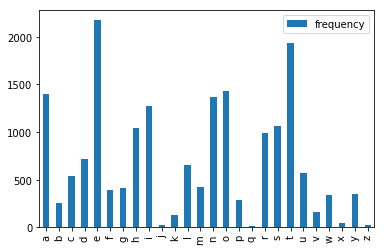

In [6]:
"""
Execute this block and include the output in your writeup.
"""
text_obj = TextMining('excerpts_dark_forest.txt')
print(text_obj.count_words())
print(text_obj.count_unique_words())
print(text_obj.unique_characters())
print(text_obj.unique_numbers())

print(text_obj.alphabet_freq())

alphabet_freq = text_obj.alphabet_freq()
freq_df = text_obj.alphabet_freq_df(alphabet_freq)
text_obj.plot_alphabet(freq_df)

<big>Problem 3</big>

In [10]:
from shapely.geometry import Polygon, Point, LineString

In [2]:
"""
HINT:
Check https://shapely.readthedocs.io/en/stable/manual.html for details (it has almost everything you need)
"""
def create_polygons(boundary_coords):
    poly = Polygon(boundary_coords)
    return poly

def calculate_areas_of_intersection(poly1, poly2):
    """
    TODO:
    1. find the intersection of two polygons
    2. calculate the area of the intersection(s)
    """
    x = poly1.intersection(poly2).area
    return x

def calculate_areas_of_union(poly1, poly2):
    """
    TODO:
    1. find the union of two polygons
    2. calculate the area of the union(s)
    """
    union = poly1.union(poly2).area
    return union

def create_line_strings(ls_coords):
    
    return LineString(ls_coords)

def check_intersect_of_ls(ls1, ls2):
    """
    TODO:
    return True if two line strings intersect
    return False otherwise
    """
    return ls1.crosses(ls2)

In [3]:
boundary_poly1 = [(26.28843, -81.2289),(26.28758, -81.20704),(26.25265, -81.17424),(26.10507, -81.05399),(26.07176, -81.05371),(25.96929, -81.05366),(25.93087, -81.09241),(25.89438, -81.13046),(25.85724, -81.21336),(25.85678, -81.23206),(25.85678, -81.26908),(25.85747, -81.30706),(25.89316, -81.35036),(25.97398, -81.4368),(26.13718, -81.4368),(26.2164 ,-81.34938),(26.23962, -81.32186),(26.2519 ,-81.30656),(26.28843, -81.2289)]
boundary_poly2 = [(26.39642, -80.33508),(26.35857, -80.21314),(26.3348 ,-80.21249),(26.29274, -80.21259),(26.14611, -80.25098),(26.11615, -80.289),(26.10832, -80.30208),(26.07566, -80.36576),(26.03664, -80.49353),(26.03635, -80.51376),(26.03639, -80.53557),(26.03675, -80.58669),(26.05827, -80.59536),(26.24977, -80.59516),(26.28015, -80.59478),(26.32421, -80.55287),(26.36002, -80.50745),(26.39595, -80.43837),(26.39642, -80.33508)]
boundary_poly3 = [(26.6078 ,-80.37978),(26.56995, -80.25784),(26.54618, -80.25719),(26.50412, -80.25729),(26.35749, -80.29568),(26.32753, -80.33369),(26.31969, -80.34678),(26.28703, -80.41045),(26.24802, -80.53823),(26.24773, -80.55846),(26.24777, -80.58027),(26.24813, -80.63139),(26.26965, -80.64005),(26.46114, -80.63986),(26.49153, -80.63948),(26.53559, -80.59756),(26.5714 ,-80.55215),(26.60732, -80.48306),(26.6078 ,-80.37978)]
coords_ls1 = [(39.1833, -76.7333),(39.2000, -76.8000),(39.2167, -76.8667),(39.2500, -76.9500),(39.2667, -77.0333),(39.3000, -77.1333),(39.3500, -77.2500),(39.3833, -77.3500),(39.4167, -77.4667),(39.4500, -77.5833),(39.4833, -77.7000),(39.5167, -77.8000),(39.5500, -77.9167),(39.5833, -78.0333),(39.6500, -78.2500),(39.7000, -78.3833),(39.7333, -78.5167),(39.7667, -78.6500),(39.8333, -78.7667),(39.8833, -78.9000),(39.9500, -79.0167),(40.0000, -79.1333),(40.0667, -79.2667),(40.1167, -79.3833),(40.1833, -79.5000),(40.2333, -79.6333),(40.3000, -79.7667),(40.3500, -79.9000),(40.4167, -80.0333),(40.4833, -80.1500),(40.5333, -80.2833),(40.6000, -80.4167),(40.6500, -80.5667),(40.7000, -80.7000),(40.7500, -80.8500),(40.8000, -80.9833),(40.8333, -81.1167),(40.8833, -81.2500),(40.9333, -81.3833)]
coords_ls2 = [(38.767, -83.917),(38.700, -83.733),(38.650, -83.583),(38.583, -83.383),(38.517, -83.200),(38.450, -83.017),(38.383, -82.833),(38.317, -82.633),(38.250, -82.450),(38.183, -82.283),(38.050, -81.917),(37.983, -81.750),(37.933, -81.583),(37.867, -81.417),(37.800, -81.267),(37.733, -81.100),(37.667, -80.933),(37.617, -80.767),(37.550, -80.583),(37.483, -80.417),(37.417, -80.250),(37.350, -80.083),(37.267, -79.950),(37.183, -79.817),(37.100, -79.683),(37.000, -79.533),(36.917, -79.400),(36.833, -79.267),(36.767, -79.150),(36.683, -79.033),(36.617, -79.000),(36.550, -78.983),(36.467, -78.967),(36.400, -78.933),(36.333, -78.900),(36.283, -78.817),(36.233, -78.733),(36.183, -78.650),(36.150, -78.583),(36.100, -78.517),(36.067, -78.550),(36.000, -78.650),(35.967, -78.683),(35.933, -78.733),(35.900, -78.767)]

In [4]:
poly1 = create_polygons(boundary_poly1)
poly2 = create_polygons(boundary_poly2)
poly3 = create_polygons(boundary_poly3)
poly4 = Point((26.5,-80.5)).buffer(0.25)

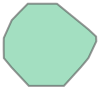

In [5]:
poly1

In [6]:
ls1 = create_line_strings(coords_ls1)
ls2 = create_line_strings(coords_ls2)

In [7]:
"""
Execute this block and include the output in your writeup.
"""
print(calculate_areas_of_intersection(poly1, poly2))
print(calculate_areas_of_intersection(poly2, poly3))
print(calculate_areas_of_intersection(poly3, poly4))
print(calculate_areas_of_union(poly1, poly2))
print(calculate_areas_of_union(poly2, poly4))
print(calculate_areas_of_union(poly3, poly4))
print(check_intersect_of_ls(ls1, ls2))

0.0
0.02593924931133175
0.10779517711658397
0.2331291194000023
0.27697014244275203
0.1981096331925395
False


### Task 2: Explore geopandas

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [4]:
artcc_df = gpd.GeoDataFrame.from_file('shp/artcc_cont.shp')[['Name', 'geometry']]
tracks = pd.read_csv('shp/sample_tracks.csv', parse_dates=[1])

In [5]:
artcc_df.head(3)

,Name,geometry
0,ARTCC ZAB,POLYGON Z ((-111.841666667 35.76666666700004 0...
1,ARTCC ZAU,POLYGON Z ((-93.46666666699997 41.666666667000...
2,ARTCC ZNY,POLYGON Z ((-76.69722222199994 42.727777778000...


In [6]:
tracks.head(3)

,ACID,Elap_Time,Lat,Lon,Alt
0,UAL386,2013-01-01 01:08:00,29.983333,-95.300000,8
1,UAL386,2013-01-01 01:09:00,30.016667,-95.266667,26
2,UAL386,2013-01-01 01:11:00,30.166667,-95.233333,86


In [7]:
print('Unique flights:', tracks.ACID.unique())

Unique flights: ['UAL386' 'UAL1295' 'UAL593']


In [8]:
def find_crossing_artcc(flight_id, 
                        flight_tracks_df, 
                        artcc_df):
    """
    TODO:
    Inputs:
        flight_id: the flight identifier, e.g., "UAL386"
        flight_tracks_df: the data frame that contains the flight tracks
        artcc_df: the data frame that contains the ARTCC geometry information
    Task:
        for flight "flight_id", find all ARTCCs that it crosses.
        for example, flight "UAL386" crosses "ZHU", "ZBW", ..., "ZNY"
    Return:
        a list of all crossing ARTCCs' name
        for example: ['ARTCC ZHU', ..., 'ARTCC ZNY']
    """
    flight_tracks_df = flight_tracks_df[flight_tracks_df['ACID'] == flight_id]
    flight_tracks_df['Coordinates'] = list(zip(flight_tracks_df.Lon, flight_tracks_df.Lat))
    flight_tracks_df['Coordinates'] = flight_tracks_df['Coordinates'].apply(Point)
    gdf = gpd.GeoDataFrame(flight_tracks_df, geometry='Coordinates')
    ##line = create_line_strings(flight_tracks_df['Coordinates'])
    intersect = gpd.sjoin(artcc_df, gdf, how='inner', op='contains')
    
    return intersect.Name.unique()

In [11]:
"""
Execute this block and include the output in your writeup.
"""
import warnings
warnings.filterwarnings('ignore')

crossed_artcc = find_crossing_artcc(flight_id = 'UAL386', 
                                    flight_tracks_df = tracks, 
                                    artcc_df = artcc_df)
print('flight UAL386 crossed: ', crossed_artcc)

flight UAL386 crossed:  ['ARTCC ZNY' 'ARTCC ZBW' 'ARTCC ZFW' 'ARTCC ZHU' 'ARTCC ZID' 'ARTCC ZME'
 'ARTCC ZOB']


In [12]:
"""
Execute this block and include the output in your writeup.
"""


crossed_artcc = find_crossing_artcc(flight_id = 'UAL1295', 
                                    flight_tracks_df = tracks, 
                                    artcc_df = artcc_df)
print('flight UAL1295 crossed: ', crossed_artcc)

flight UAL1295 crossed:  ['ARTCC ZNY' 'ARTCC ZBW' 'ARTCC ZDC' 'ARTCC ZFW' 'ARTCC ZHU' 'ARTCC ZID'
 'ARTCC ZME']


In [13]:
"""
Execute this block and include the output in your writeup.
"""
crossed_artcc = find_crossing_artcc(flight_id = 'UAL593', 
                                    flight_tracks_df = tracks, 
                                    artcc_df = artcc_df)
print('flight UAL593 crossed: ', crossed_artcc)

flight UAL593 crossed:  ['ARTCC ZNY' 'ARTCC ZBW' 'ARTCC ZDC' 'ARTCC ZHU' 'ARTCC ZTL']


### Extra Credit

In [14]:
def find_crossing_artcc_order(flight_id, 
                             flight_tracks_df, 
                             artcc_df):
   
    flight_tracks_df = flight_tracks_df[flight_tracks_df['ACID'] == flight_id]
    flight_tracks_df['Coordinates'] = list(zip(flight_tracks_df.Lon, flight_tracks_df.Lat))
    flight_tracks_df['Coordinates'] = flight_tracks_df['Coordinates'].apply(Point)
    gdf = gpd.GeoDataFrame(flight_tracks_df, geometry='Coordinates')

    intersect = gpd.sjoin(artcc_df, gdf, how='inner', op='contains')
    intersect.sort_values(by = "Elap_Time", axis=0, ascending=True)  
    
    return intersect.Name.unique()


In [42]:
"""
Execute this block and include the output in your writeup.
"""
crossed_artcc = find_crossing_artcc_order(flight_id = 'UAL386', 
                                         flight_tracks_df = tracks, 
                                         artcc_df = artcc_df)
print('flight UAL386 crossed: ', crossed_artcc)

crossed_artcc = find_crossing_artcc_order(flight_id = 'UAL1295', 
                                          flight_tracks_df = tracks, 
                                          artcc_df = artcc_df)
print('flight UAL1295 crossed: ', crossed_artcc)

crossed_artcc = find_crossing_artcc_order(flight_id = 'UAL593', 
                                          flight_tracks_df = tracks, 
                                          artcc_df = artcc_df)
print('flight UAL593 crossed: ', crossed_artcc)

flight UAL386 crossed:  ['ARTCC ZNY' 'ARTCC ZBW' 'ARTCC ZFW' 'ARTCC ZHU' 'ARTCC ZID' 'ARTCC ZME'
 'ARTCC ZOB']
flight UAL1295 crossed:  ['ARTCC ZNY' 'ARTCC ZBW' 'ARTCC ZDC' 'ARTCC ZFW' 'ARTCC ZHU' 'ARTCC ZID'
 'ARTCC ZME']
flight UAL593 crossed:  ['ARTCC ZNY' 'ARTCC ZBW' 'ARTCC ZDC' 'ARTCC ZHU' 'ARTCC ZTL']


In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patches as plt_patch
%matplotlib inline

In [53]:
def plot_on_map(flight_tracks_df,
                artcc_df):
    
    fig = plt.figure(figsize=(12,8))
    
    m = Basemap(llcrnrlon = -128, llcrnrlat = 22.5, urcrnrlon = -63, urcrnrlat = 50, projection='merc')
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    m.drawstates(linewidth=0.2)
    """
    TODO:
    finish the code to plot all ARTCCs and flights on the US map
    """
    GRAY = '#000000'
    
    #plot flights
    lat = flight_tracks_df.Lat.values
    lon = flight_tracks_df.Lon.values  
    x, y = m(lon, lat)
    m.scatter(x, y, marker = 'o', color='r')
    
    for i in range(20):
        poly = artcc_df['geometry'][i]
        coords = np.array(poly.boundary.coords)[:,0:2]
        lons = coords[:,0]
        lats = coords[:,1]
        x, y = m( lons, lats )
        xy = zip(x,y)
        patch = plt_patch.Polygon(list(xy), fc=(i/20,i/20,i/20), ec=GRAY, alpha=0.5, zorder=2)
        plt.gca().add_patch(patch)
    
    plt.show()
    return m

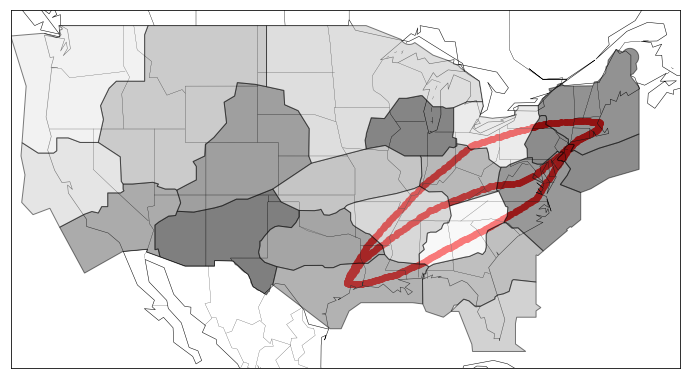

In [54]:
plot_on_map(tracks, artcc_df)
plt.show()